pattern prob 100.0 %
pattern real prob 100.0 %
pattern total prob 15.146977484587262 %
370635


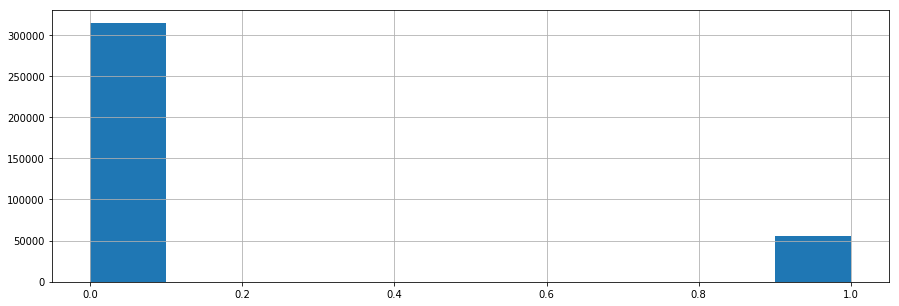

In [1]:
http://twl.tisserv.net:8888/notebooks/notebooks/skeleton%20mavg%20classified%207.2.ipynb#import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

%load_ext autoreload
%autoreload 2
%run '../main.py'

dataSetOps = DataSetOps()

mul = 10000

dataSetOps.import_years(2017, 2017)
dataSetOps.df['max'] = dataSetOps.df['max'] * mul
dataSetOps.df['min'] = dataSetOps.df['min'] * mul
dataSetOps.df['open'] = dataSetOps.df['open'] * mul
dataSetOps.df['price'] = dataSetOps.df['price'] * mul

dataSetOps.prepare()


df = dataSetOps.df

# print(df)
# variables
mavglar = [30, 50, 70]
window = 15
spread = 1.5
epilson = spread * mul / 10000

########

df['value'] = True
for mavgl in mavglar:
    mavgl = str(mavgl)
    df['f_mavg' + mavgl] = df['mavg' + mavgl].shift(-window).rolling(window=50).mean()
    df['value'] = df['value'] & (df['f_mavg' + mavgl] - df['mavg' + mavgl] > epilson)
    #df[['price', 'mavg' + mavgl, 'mavg10', 'f_mavg' + mavgl]].head(1000).plot()
    
    
df['f_price'] = df['price'].shift(-window).rolling(window=window).max()
df['f_price_m'] = df['price'].shift(-window).rolling(window=window).min()
df['value_real_l'] = df['f_price'] - df['price'] > epilson * 3
df['value_real_r'] = df['price'] - df['f_price_m'] < epilson
df['value_real'] = df['value_real_l'] & df['value_real_r']

#####
# df['value'] = df['value'] & df['value_real']
df['value'] = df['value_real']

df['value'].astype(int).hist()
print('pattern prob', (len(df[df['value']]) / (len(df[df['value_real']]))) * 100, '%')
print('pattern real prob', (len(df[df['value'] & df['value_real']]) / (len(df[df['value']]))) * 100, '%')
print('pattern total prob', (len(df[df['value']]) / (len(df))) * 100, '%')
print(len(df))

####

dfra = df[['price', 'mavg10', 'mavg20', 'mavg50', 'mavg80', 'mavg100']]
dfval = df['value'] # prev value


In [2]:
%run '../main.py'

In [3]:
lib1 = StandartClassifier()
lib1.init(dfra, dfval, 20, 7)
lib1.run()

Using TensorFlow backend.
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=16, kernel_initializer="uniform")`
  class1 = Dense(output_dim=16, init='uniform', activation='relu', input_dim=len(self.X.columns))
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  class2 = Dense(output_dim=16, init='uniform', activation='relu')
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  class3 = Dense(output_dim=16, init='uniform', activation='relu')
/home/taleh/Projects/TensorTradeBase/lib/standartclassifier.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid",

Epoch 1/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1295 - mean_absolute_error: 0.2584 - acc: 0.8482
Epoch 2/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2574 - acc: 0.8483
Epoch 3/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2573 - acc: 0.8483
Epoch 4/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2574 - acc: 0.8483
Epoch 5/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2574 - acc: 0.8483
Epoch 6/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2574 - acc: 0.8483
Epoch 7/7
333571/333571 [==============================] - 7s 21us/step - loss: 0.1288 - mean_absolute_error: 0.2574 - acc: 0.8483
classifier saved to  /tmp/mavg_classifier_327991


begin analysing
confusion_matrix: [[31538     0]
 [ 5526     0]]
class_accuracy => accuracy:  0.5 risk:  1
optimistic_accuracy => risk:  0.83 min pass point:  0.1544894
AxesSubplot(0.125,0.125;0.775x0.755)


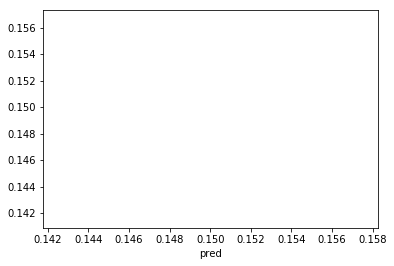

In [4]:
class StandartAnalyser:
    def init(self, classifier):
        self.classifier = classifier
    
    def analyse(self, X, y_test, name):
        print('begin analysing')
        # Creating the Confusion Matrix
        from sklearn.metrics import confusion_matrix
        from lib.helper import AccuracyCalculator
        y_pred = self.classifier.predict(X)
        cm = confusion_matrix(y_test, (y_pred > 0.58))
        print('confusion_matrix:', cm)
        
        %matplotlib inline 
        
        AccuracyCalculator.class_accuracy(cm)
        AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
        risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)
        
        print((1-risk_hist_df.risk).plot())
        #### 

#         dfx = df[df['value']]
#         p_f = len(dfx[dfx['value_real']]) / len(dfx)
#         p_r = cm[1,1] / (cm[1,1] + cm[0,1])
#         print('real prob', p_f , p_r, p_f * p_r)
        
    def analyse2(self):

        ###

        y_all_pred = self.predict(self.X)
        y_f_price_real = df['value_real']
        cm = confusion_matrix(y_f_price_real, (y_all_pred > 0.58))

        AccuracyCalculator.class_accuracy(cm)
        AccuracyCalculator.optimistic_accuracy(y_all_pred[:,0], y_f_price_real, 100)
        risk_hist_df = AccuracyCalculator.risk_hist(y_all_pred[:,0], y_f_price_real)

        print(cm)

        print((1-risk_hist_df.risk).plot())

        ####

        dfr = df[df['value']]
        print(dfr['value_real'].astype(int).hist())
        print(len(dfr[dfr['value_real']]) / (len(dfr)))
        print(len(dfr['value_real']))
        
analyser1 = StandartAnalyser()
analyser1.init(lib1)
analyser1.analyse(lib1.X_test, lib1.y_test, 'a1')

In [5]:
lib1.predict(lib1.X_test)

array([[0.1544894],
       [0.1544894],
       [0.1544894],
       ...,
       [0.1544894],
       [0.1544894],
       [0.1544894]], dtype=float32)

In [6]:
lib1.X_test

,price,mavg10,mavg20,mavg50,mavg80,mavg100
332000,11744.0,11743.34,11743.245,11743.038,11744.49500,11743.767
205811,11503.3,11504.49,11503.520,11502.250,11502.75000,11502.055
51622,10581.3,10581.08,10580.495,10579.884,10579.99375,10580.248
235974,11757.0,11761.12,11754.300,11744.936,11739.92625,11741.612
264156,11918.9,11920.62,11919.150,11918.834,11918.69375,11917.491
247578,11947.0,11947.59,11947.260,11946.512,11947.77250,11948.036
365629,11847.4,11842.44,11841.415,11839.614,11837.94375,11837.097
232050,11730.5,11726.88,11726.875,11722.894,11718.83125,11716.155
128919,11010.8,11010.48,11008.920,11007.992,11003.89875,11002.194
250079,11898.1,11898.16,11899.095,11900.566,11902.40875,11903.065


In [7]:
# lib1.X_test[lib1.X_test['pred'] > 0.5]